<a href="https://colab.research.google.com/github/FrankSun0616/Brown_Jet_Physics_Research/blob/main/Jet_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

!pip install energyflow
import energyflow as ef

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.5/700.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.2/502.2 kB 48.8 MB/s eta 0:00:00


In [2]:
# Step 1: Load the Data
# Load SIM jets as an example; adjust 'dataset' and other parameters as necessary
modds = ef.mod.load(amount=1.0, dataset='sim', subdatasets={'SIM170_Jet300_pT375-infGeV'}, store_pfcs=True, store_gens=True, verbose=1)

Loaded SIM170_Jet300_pT375-infGeV in 4.685s


In [ ]:
# Step 2: Data Preprocessing
jet_etas = modds.jet_etas
gen_jet_etas = modds.gen_jet_etas  # GEN jet pts; target for regression

features_etas = jet_etas.reshape(-1, 1)#make sure the entry has shape (XXX,1)
targets_etas = gen_jet_etas  # True energy values

# Split into training and testing sets
etasx_train, etasx_test, etasy_train, etasy_test = train_test_split(features_etas, targets_etas, test_size=0.2, random_state=42)
print(gen_jet_etas)

[-0.19094489 -0.08164835  0.46801164 ... -1.1754192   1.00701882
 -0.99067053]


In [ ]:
# Step 3: Building the DNN Model
model_etas = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_etas.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
#Step 4: Training and Evaluation
history = model_etas.fit(etasx_train, etasy_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)])

#Evaluate model performance
test_loss, test_mae = model_etas.evaluate(etasx_test, etasy_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/100
273/273 [==============================] - 2s 3ms/step - loss: 0.0265 - mae: 0.0511 - val_loss: 1.3032e-04 - val_mae: 0.0063
Epoch 2/100
273/273 [==============================] - 1s 2ms/step - loss: 3.2956e-04 - mae: 0.0071 - val_loss: 1.3806e-04 - val_mae: 0.0067
Epoch 3/100
273/273 [==============================] - 1s 2ms/step - loss: 3.4970e-04 - mae: 0.0078 - val_loss: 1.2829e-04 - val_mae: 0.0062
Epoch 4/100
273/273 [==============================] - 1s 3ms/step - loss: 3.4432e-04 - mae: 0.0076 - val_loss: 1.8409e-04 - val_mae: 0.0087
Epoch 5/100
273/273 [==============================] - 1s 2ms/step - loss: 3.5838e-04 - mae: 0.0080 - val_loss: 1.5246e-04 - val_mae: 0.0073
Epoch 6/100
273/273 [==============================] - 1s 2ms/step - loss: 3.4939e-04 - mae: 0.0077 - val_loss: 1.4479e-04 - val_mae: 0.0069
Epoch 7/100
273/273 [==============================] - 1s 2ms/step - loss: 3.4789e-04 - mae: 0.0077 - val_loss: 1.3784e-04 - val_mae: 0.0065
Epoch 8/100
273/2

86/86 [==============================] - 0s 1ms/step


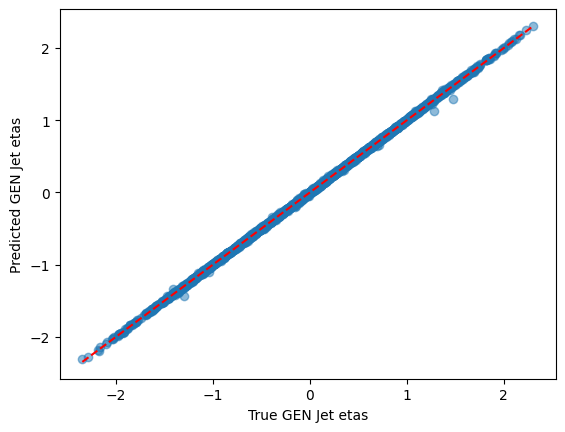

In [ ]:
predictions_etas = model_etas.predict(etasx_test).flatten()
plt.scatter(etasy_test, predictions_etas, alpha=0.5)
plt.xlabel('True GEN Jet etas')
plt.ylabel('Predicted GEN Jet etas')
plt.plot([min(etasy_test), max(etasy_test)], [min(etasy_test), max(etasy_test)], 'r--')
plt.show()

86/86 [==============================] - 0s 4ms/step


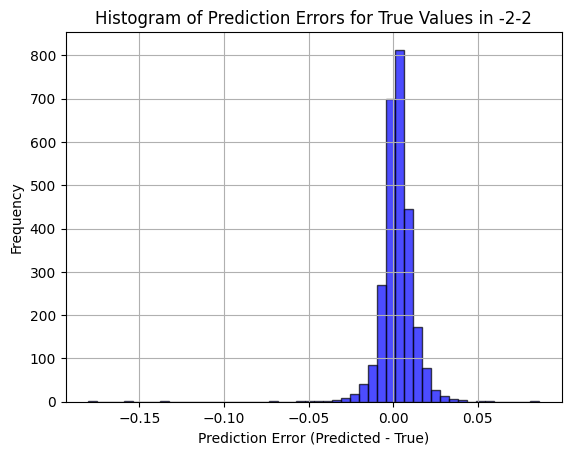

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'predictions' and 'y_test' are already defined and contain your model's predictions and the actual values, respectively
# Ensure 'y_test' and 'predictions' are correctly shaped
predictions_etas = model_etas.predict(etasx_test).flatten()  # This line assumes 'model' and 'X_test' are already defined
y_test_flat = etasy_test.flatten()  # Ensuring y_test is a flat array for consistent operations
x_test_flat = etasx_test.flatten()
# Calculate the differences between predictions and true values
errors = predictions_etas - y_test_flat

# Define ranges
ranges = [(-2,2)]

# Loop through each range and create a histogram for each
for lower_bound, upper_bound in ranges:
    # Find indices where true values fall within the current range
    indices = (x_test_flat >= lower_bound) & (x_test_flat < upper_bound)

    # Filter errors based on indices
    filtered_errors = errors[indices]

    # Plot a histogram of the filtered errors
    plt.figure()  # Create a new figure for each histogram
    plt.hist(filtered_errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Prediction Error (Predicted - True)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Prediction Errors for True Values in {lower_bound}-{upper_bound}')
    plt.grid(True)
    plt.show()

In [3]:
jet_pts = modds.jet_pts
jet_etas = modds.jet_etas
gen_jet_pts = modds.gen_jet_pts  # GEN jet pts; target for regression

# Stack features without normalization
features = jet_pts.reshape(-1, 1)
targets = gen_jet_pts  # True energy values
#features = gen_jet_pts.reshape(-1, 1)
#targets = jet_pts  # True energy values

# Split into training and testing sets without scaling features
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
#random_state=42


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.02, beta_1=0.9, beta_2=0.999), loss='MeanSquaredError', metrics=['mae'])
#loss function: 1.MeanSquaredError, 2.MeanAbsoluteError, 3.MeanSquaredLogarithmicError not useful, 4.MeanAbsolutePercentageError, 5.LogCosh, 6.tf.keras.losses.Huber(delta=1.0), 7.tf.keras.losses.CosineSimilarity(axis=1)not useful for this one
#optimizer: tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999), tf.keras.optimizers.Adamax(learning_rate=0.02, beta_1=0.9, beta_2=0.999), tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)not useful for this one



In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)
#callbacks=[tf.keras.callbacks.EarlyStopping( verbose=1)]

# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/100
307/307 [==============================] - 2s 3ms/step - loss: 1410.9742 - mae: 22.7417 - val_loss: 558.2943 - val_mae: 18.4570
Epoch 2/100
307/307 [==============================] - 1s 2ms/step - loss: 588.8721 - mae: 18.1331 - val_loss: 514.0785 - val_mae: 17.6442
Epoch 3/100
307/307 [==============================] - 1s 2ms/step - loss: 595.8068 - mae: 18.2816 - val_loss: 511.4794 - val_mae: 17.5799
Epoch 4/100
307/307 [==============================] - 1s 2ms/step - loss: 588.6012 - mae: 18.1535 - val_loss: 527.7343 - val_mae: 17.9233
Epoch 5/100
307/307 [==============================] - 1s 2ms/step - loss: 609.0470 - mae: 18.5778 - val_loss: 533.5082 - val_mae: 17.8664
Epoch 6/100
307/307 [==============================] - 1s 3ms/step - loss: 657.3565 - mae: 19.3653 - val_loss: 522.8976 - val_mae: 17.7031
Epoch 7/100
307/307 [==============================] - 1s 3ms/step - loss: 666.6510 - mae: 19.4586 - val_loss: 780.9948 - val_mae: 22.3082
Epoch 8/100
307/307 [=====

86/86 [==============================] - 0s 1ms/step
[424.5939  404.82016 365.75732 ... 352.60834 432.78412 383.1025 ]


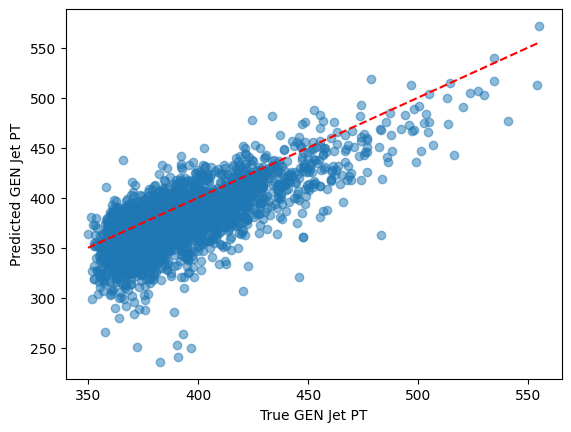

In [ ]:
# Predictions
predictions = model.predict(X_test).flatten()
print(predictions)

# Scatter plot
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True GEN Jet PT')
plt.ylabel('Predicted GEN Jet PT')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


86/86 [==============================] - 1s 6ms/step


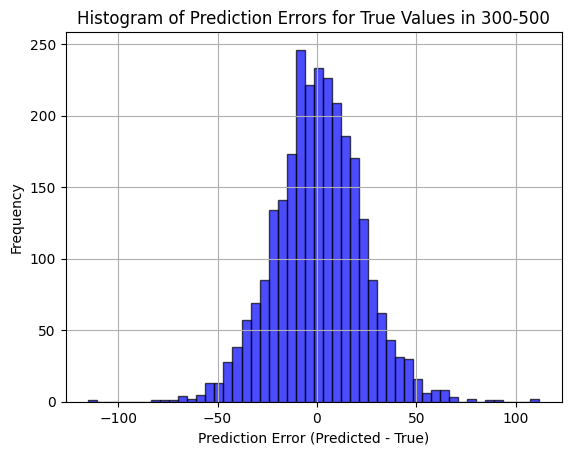

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test).flatten()
y_test_flat = y_test.flatten()


errors = predictions - y_test_flat

# Define ranges
#ranges = [(300, 400), (400, 450), (450, 500)]
ranges = [(300, 500)]
for lower_bound, upper_bound in ranges:
    indices = (y_test_flat >= lower_bound) & (y_test_flat < upper_bound)

    filtered_errors = errors[indices]

    plt.figure()
    plt.hist(filtered_errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Prediction Error (Predicted - True)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Prediction Errors for True Values in {lower_bound}-{upper_bound}')
    plt.grid(True)
    plt.show()


86/86 [==============================] - 0s 1ms/step


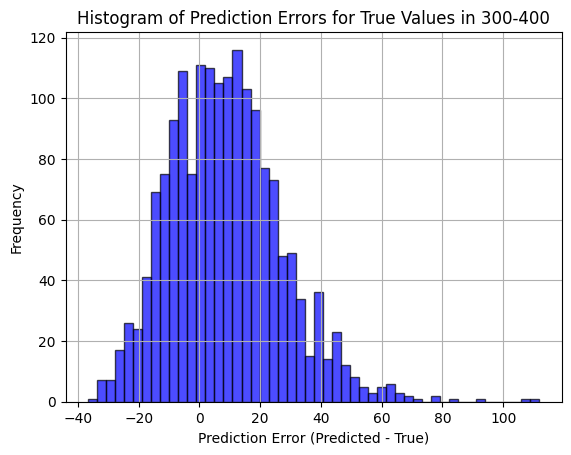

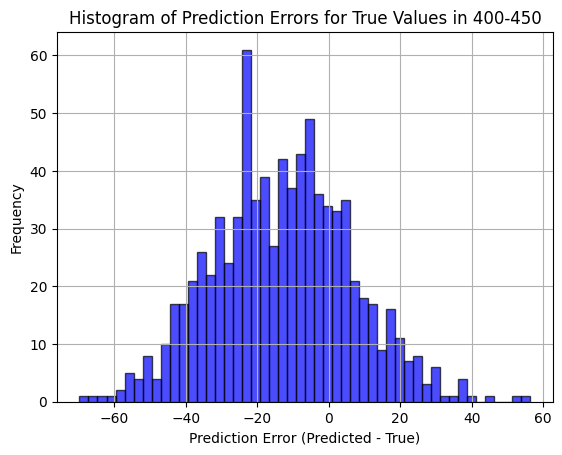

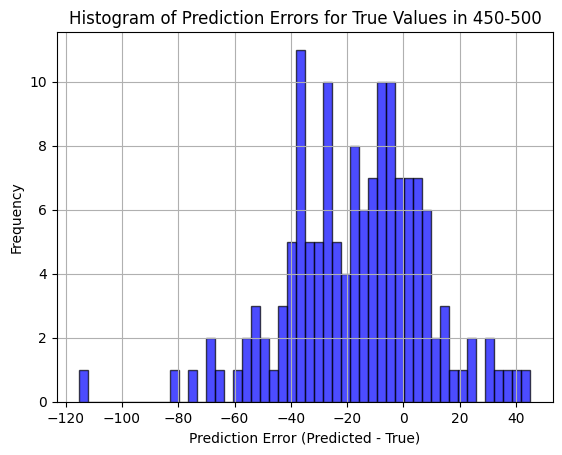

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test).flatten()
y_test_flat = y_test.flatten()

errors = predictions - y_test_flat

# Define ranges
ranges = [(300, 400), (400, 450), (450, 500)]
#ranges = [(300, 500)]
for lower_bound, upper_bound in ranges:
    indices = (y_test_flat >= lower_bound) & (y_test_flat < upper_bound)

    filtered_errors = errors[indices]

    plt.figure()
    plt.hist(filtered_errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Prediction Error (Predicted - True)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Prediction Errors for True Values in {lower_bound}-{upper_bound}')
    plt.grid(True)
    plt.show()

86/86 [==============================] - 0s 1ms/step


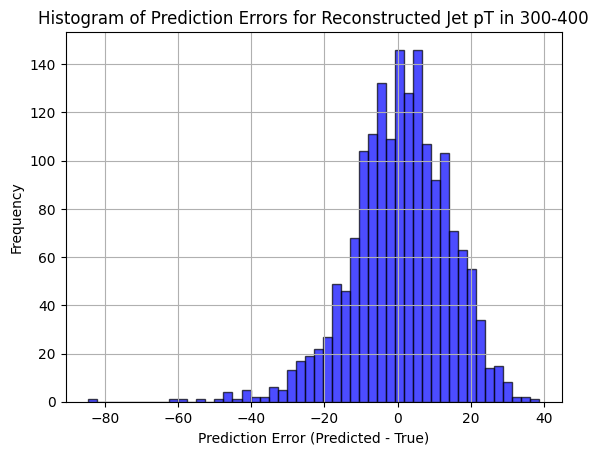

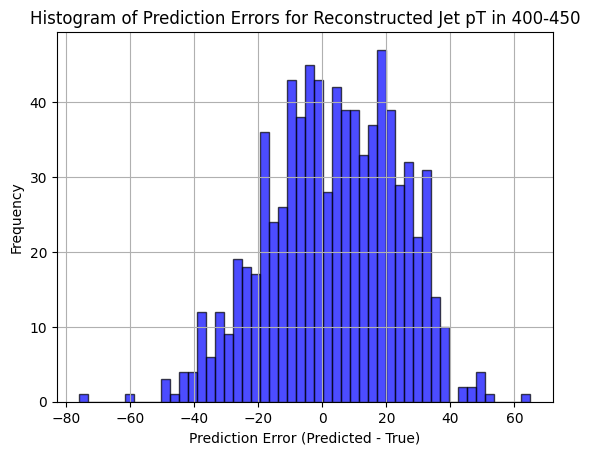

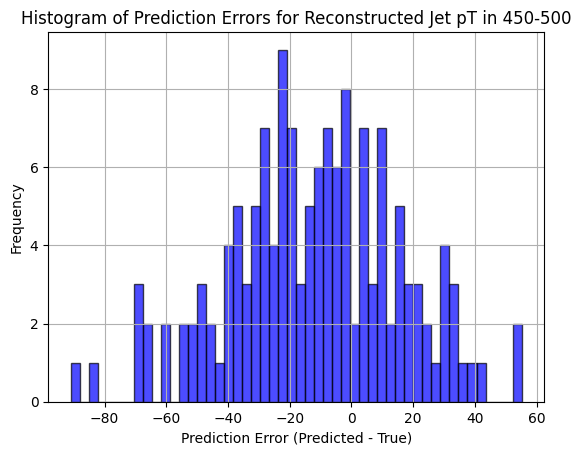

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test).flatten()
y_test_flat = y_test.flatten()

# Calculate the differences between predictions and true values
errors = predictions - y_test_flat

ranges = [(300, 400), (400, 450), (450, 500)]
#ranges = [(300, 500)]

for lower_bound, upper_bound in ranges:
    indices = (X_test[:, 0] >= lower_bound) & (X_test[:, 0] < upper_bound)

    # Filter errors based on the indices determined by reconstructed jet pT
    filtered_errors = errors[indices]

    # Plot a histogram of the filtered errors
    plt.figure()
    plt.hist(filtered_errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Prediction Error (Predicted - True)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Prediction Errors for Reconstructed Jet pT in {lower_bound}-{upper_bound}')
    plt.grid(True)
    plt.show()



86/86 [==============================] - 0s 1ms/step


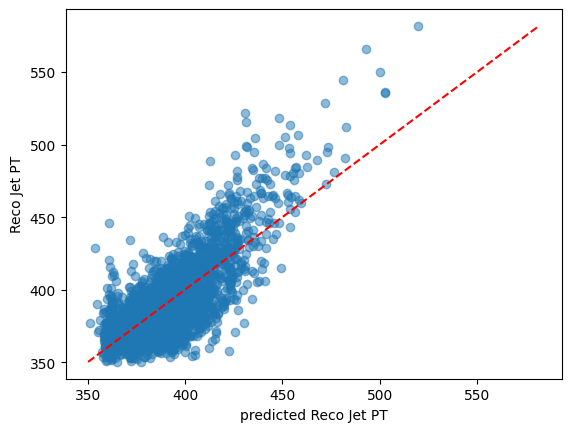

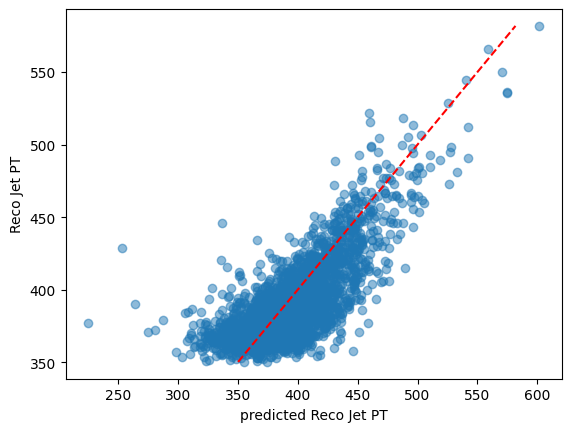

In [ ]:
# Predictions
predictions = model.predict(X_test).flatten()
# Scatter plot
plt.scatter(predictions, y_test, alpha=0.5)
plt.xlabel('predicted Reco Jet PT')
plt.ylabel('Reco Jet PT')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()
plt.scatter(X_test, y_test, alpha=0.5)
plt.xlabel('predicted Reco Jet PT')
plt.ylabel('Reco Jet PT')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

13/13 [==============================] - 0s 2ms/step


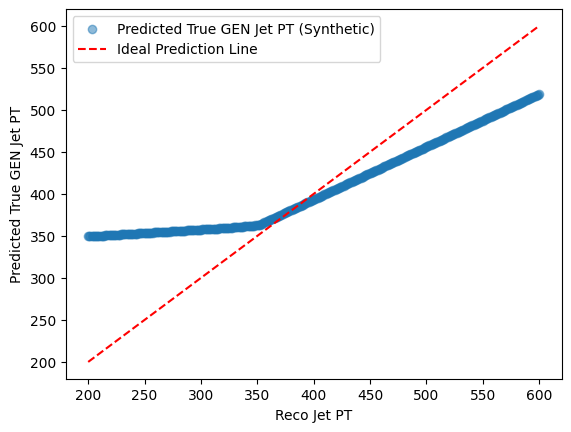

In [ ]:
synthetic_jet_pts = np.linspace(200, 600, 400).reshape(-1, 1)
synthetic_predictions = model.predict(synthetic_jet_pts).flatten()

plt.scatter(synthetic_jet_pts, synthetic_predictions, alpha=0.5, label='Predicted True GEN Jet PT (Synthetic)')

# Add reference line
plt.plot([200, 600], [200, 600], 'r--', label='Ideal Prediction Line')

plt.xlabel('Reco Jet PT')
plt.ylabel('Predicted True GEN Jet PT')
plt.legend()
plt.show()



13/13 [==============================] - 0s 2ms/step


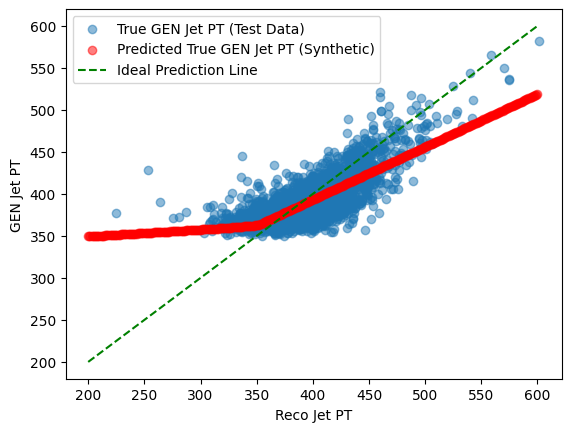

In [ ]:
import matplotlib.pyplot as plt

synthetic_jet_pts = np.linspace(200, 600, 400).reshape(-1, 1)
synthetic_predictions = model.predict(synthetic_jet_pts).flatten()

plt.scatter(X_test[:, 0], y_test, alpha=0.5, label='True GEN Jet PT (Test Data)')

# Overlay with synthetic data predictions (Predicted GEN Jet PT vs. Synthetic Reco Jet PT)
plt.scatter(synthetic_jet_pts, synthetic_predictions, alpha=0.5, color='red', label='Predicted True GEN Jet PT (Synthetic)')

# Add reference line for synthetic predictions to ideal scenario
plt.plot([200, 600], [200, 600], 'g--', label='Ideal Prediction Line')


plt.xlabel('Reco Jet PT')
plt.ylabel('GEN Jet PT')
plt.legend()
plt.show()


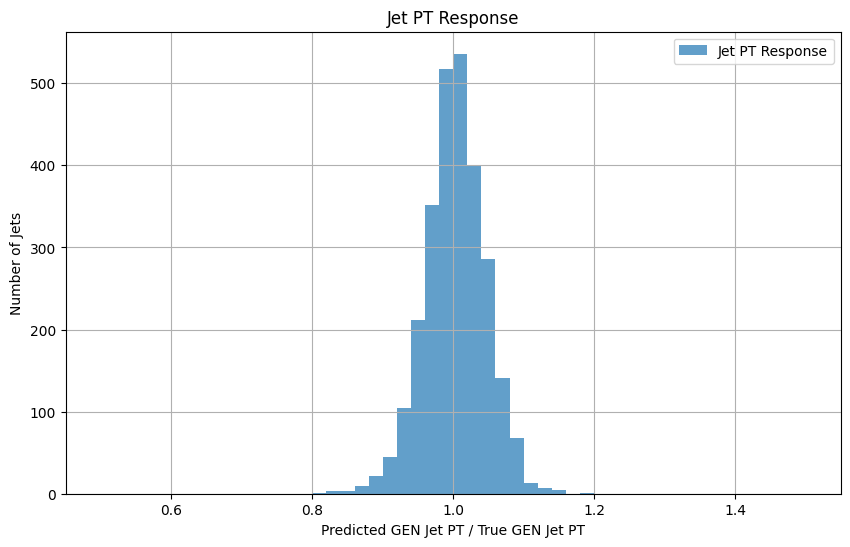

In [ ]:
#The jet PT response is defined as the ratio of the predicted GEN Jet PT to the true GEN Jet PT.
jet_pt_response = predictions / y_test
#Plot Jet response
plt.figure(figsize=(10, 6))
plt.hist(jet_pt_response, bins=50, range=(0.5, 1.5), alpha=0.7, label='Jet PT Response')
plt.xlabel('Predicted GEN Jet PT / True GEN Jet PT')
plt.ylabel('Number of Jets')
plt.title('Jet PT Response')
plt.legend()
plt.grid(True)
plt.show()


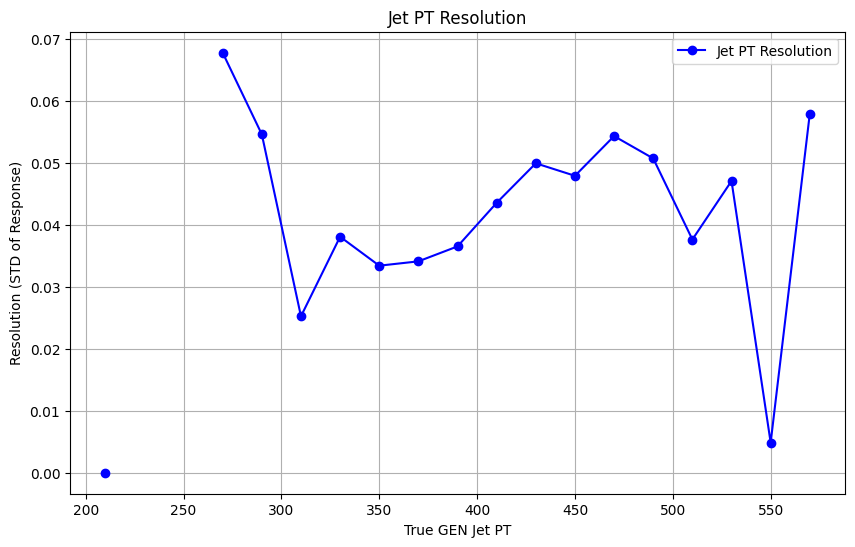

In [ ]:
#Jet PT resolution: standard deviation of the jet PT response in bins of true GEN Jet PT.
bin_edges = np.linspace(200, 600, 21)#bin size changable
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
resolution = []

for i in range(len(bin_edges)-1):
    bin_mask = (y_test >= bin_edges[i]) & (y_test < bin_edges[i+1])
    responses_in_bin = jet_pt_response[bin_mask]
    resolution.append(np.std(responses_in_bin))

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, resolution, marker='o', linestyle='-', color='blue', label='Jet PT Resolution')
plt.xlabel('True GEN Jet PT')
plt.ylabel('Resolution (STD of Response)')
plt.title('Jet PT Resolution')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


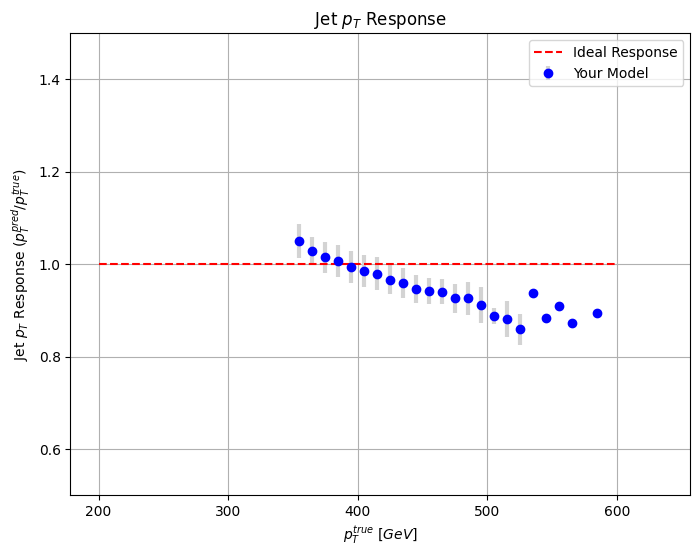

In [ ]:
bin_edges = np.arange(200, 650, 10)  # Creates bin edges from 200 to 600 in steps of 50
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculates the center of each bin
responses = []
response_errors = []

for i in range(len(bin_edges)-1):
    # Find indices of y_test that fall into the current bin
    indices = (y_test >= bin_edges[i]) & (y_test < bin_edges[i+1])

    # Calculate the response ratio for these indices
    response_ratios = predictions[indices] / y_test[indices]

    # Calculate mean response and standard deviation (error) for the current bin
    mean_response = np.mean(response_ratios)
    std_response = np.std(response_ratios)

    responses.append(mean_response)
    response_errors.append(std_response)

plt.figure(figsize=(8, 6))
plt.errorbar(bin_centers, responses, yerr=response_errors, fmt='o', label='Your Model', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot([200, 600], [1, 1], 'r--', label='Ideal Response')  # Ideal response line at y=1
plt.xlabel(r'$p_T^{true} \ [GeV]$')
plt.ylabel(r'Jet $p_T$ Response ($p_T^{pred}/p_T^{true}$)')
plt.title('Jet $p_T$ Response')
plt.ylim(0.5, 1.5)  # Adjust as needed
plt.legend()
plt.grid(True)
plt.show()


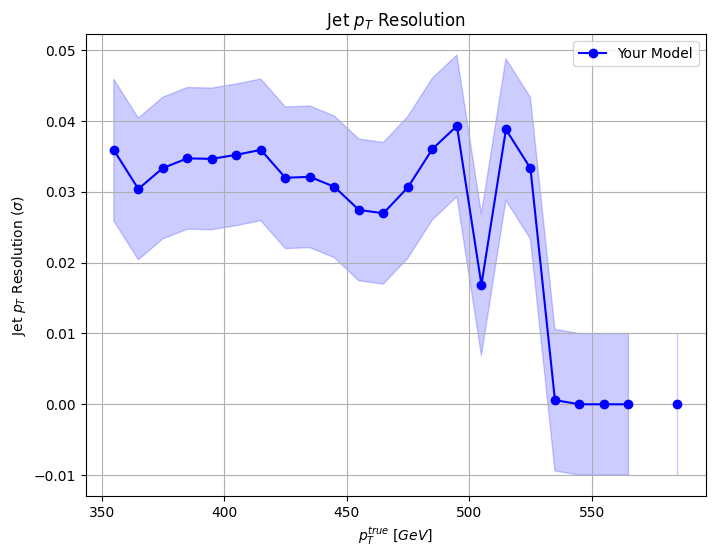

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Bin edges and centers
bin_edges = np.arange(200, 650, 10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initialize lists for responses and their standard deviation (as resolution)
responses = []
resolution = []
resolution_errors = []  # Assuming you have a measure of error for resolution

for i in range(len(bin_edges)-1):
    bin_mask = (y_test >= bin_edges[i]) & (y_test < bin_edges[i+1])
    response_ratios = predictions[bin_mask] / y_test[bin_mask]

    if len(response_ratios) > 0:
        responses.append(np.mean(response_ratios))
        resolution.append(np.std(response_ratios))
    else:
        responses.append(np.nan)
        resolution.append(np.nan)  # Placeholder for empty bins

# Assume resolution_errors as a simple example
resolution_errors = [0.01] * len(resolution)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, resolution, 'o-', label='Your Model', color='blue')
plt.fill_between(bin_centers, np.array(resolution) - np.array(resolution_errors),
                 np.array(resolution) + np.array(resolution_errors), color='blue', alpha=0.2)
plt.xlabel(r'$p_T^{true} \ [GeV]$')
plt.ylabel(r'Jet $p_T$ Resolution ($\sigma$)')
plt.title('Jet $p_T$ Resolution')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#High level variables into the training
jet_pts = modds.jet_pts
jet_etas = modds.jet_etas
gen_jet_pts = modds.gen_jet_pts
gen_jet_etas = modds.gen_jet_etas# as many as possible

In [ ]:
features_variable = np.vstack((jet_pts, jet_etas)).T  # .T to transpose and match the required shape
#add any available above

targets_variable = gen_jet_pts
#targets_variable = np.vstack((gen_jet_pts, gen_jet_etas)).T
x_variable_train, x_variable_test, y_variable_train, y_variable_test = train_test_split(features_variable, targets_variable, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features_variable.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_variable_train, y_variable_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping( verbose=1)])
test_loss = model.evaluate(x_variable_test, y_variable_test)
print(f'Test MSE Loss: {test_loss}')


Epoch 1/100
273/273 [==============================] - 1s 3ms/step - loss: 18442.3672 - val_loss: 565.6223
Epoch 2/100
273/273 [==============================] - 1s 2ms/step - loss: 570.8563 - val_loss: 565.3092
Epoch 3/100
273/273 [==============================] - 1s 2ms/step - loss: 570.7647 - val_loss: 568.2189
Epoch 3: early stopping
86/86 [==============================] - 0s 1ms/step - loss: 515.4465
Test MSE Loss: 515.4464721679688


86/86 [==============================] - 0s 2ms/step


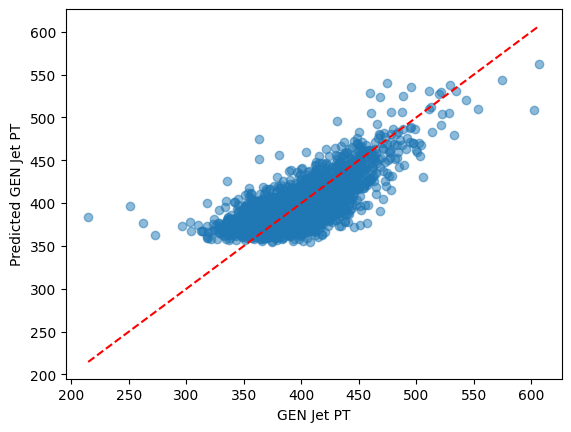

In [ ]:
predictions_variable = model.predict(x_variable_test).flatten()
import matplotlib.pyplot as plt
plt.scatter(y_variable_test, predictions_variable, alpha=0.5)
plt.xlabel('GEN Jet PT')
plt.ylabel('Predicted GEN Jet PT')
plt.plot([min(y_variable_test), max(y_variable_test)], [min(y_variable_test), max(y_variable_test)], 'r--')
plt.show()

86/86 [==============================] - 0s 3ms/step


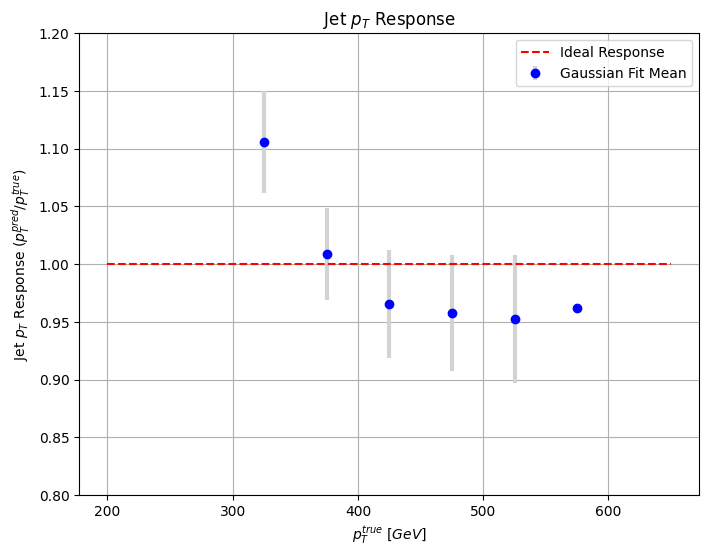

In [8]:
#The following codes are generated based on the jet response and resolution as well, but in the form of sd and mean from Gaussian Distribution
from scipy.stats import norm
import matplotlib.pyplot as plt
predictions = model.predict(X_test).flatten()


# Bin edges and centers
bin_edges = np.arange(200, 650, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

responses = []
response_errors = []

for i in range(len(bin_edges)-1):
    # Find indices of y_test that fall into the current bin
    indices = (y_test >= bin_edges[i]) & (y_test < bin_edges[i+1])

    # Calculate the response ratio for these indices
    response_ratios = predictions[indices] / y_test[indices]

    # Fit a Gaussian to the response ratios
    if len(response_ratios) > 0:
        (mu, sigma) = norm.fit(response_ratios)
        responses.append(mu)
        response_errors.append(sigma)
    else:
        responses.append(np.nan)
        response_errors.append(np.nan)

# Plotting the response
plt.figure(figsize=(8, 6))
plt.errorbar(bin_centers, responses, yerr=response_errors, fmt='o', label='Gaussian Fit Mean', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot([200, 650], [1, 1], 'r--', label='Ideal Response')  # Ideal response line at y=1
plt.xlabel(r'$p_T^{true} \ [GeV]$')
plt.ylabel(r'Jet $p_T$ Response ($p_T^{pred}/p_T^{true}$)')
plt.title('Jet $p_T$ Response')
plt.ylim(0.8, 1.2)  # Adjust as needed based on actual data range
plt.legend()
plt.grid(True)
plt.show()


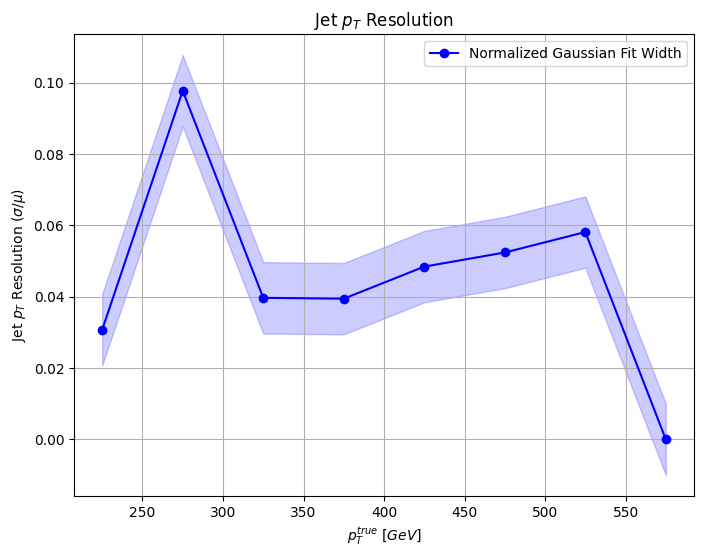

In [9]:
# Initialize lists for responses and resolution (standard deviation normalized by the mean)
resolution = []

for i in range(len(bin_edges)-1):
    bin_mask = (y_test >= bin_edges[i]) & (y_test < bin_edges[i+1])
    response_ratios = predictions[bin_mask] / y_test[bin_mask]

    if len(response_ratios) > 0:
        (mu, sigma) = norm.fit(response_ratios)
        resolution.append(sigma / mu)  # Normalized resolution
    else:
        resolution.append(np.nan)

# Plotting resolution
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, resolution, 'o-', label='Normalized Gaussian Fit Width', color='blue')
plt.fill_between(bin_centers, np.array(resolution) - 0.01, np.array(resolution) + 0.01, color='blue', alpha=0.2)  # Assuming small constant error bounds for clarity
plt.xlabel(r'$p_T^{true} \ [GeV]$')
plt.ylabel(r'Jet $p_T$ Resolution ($\sigma/\mu$)')
plt.title('Jet $p_T$ Resolution')
plt.legend()
plt.grid(True)
plt.show()
